# CA


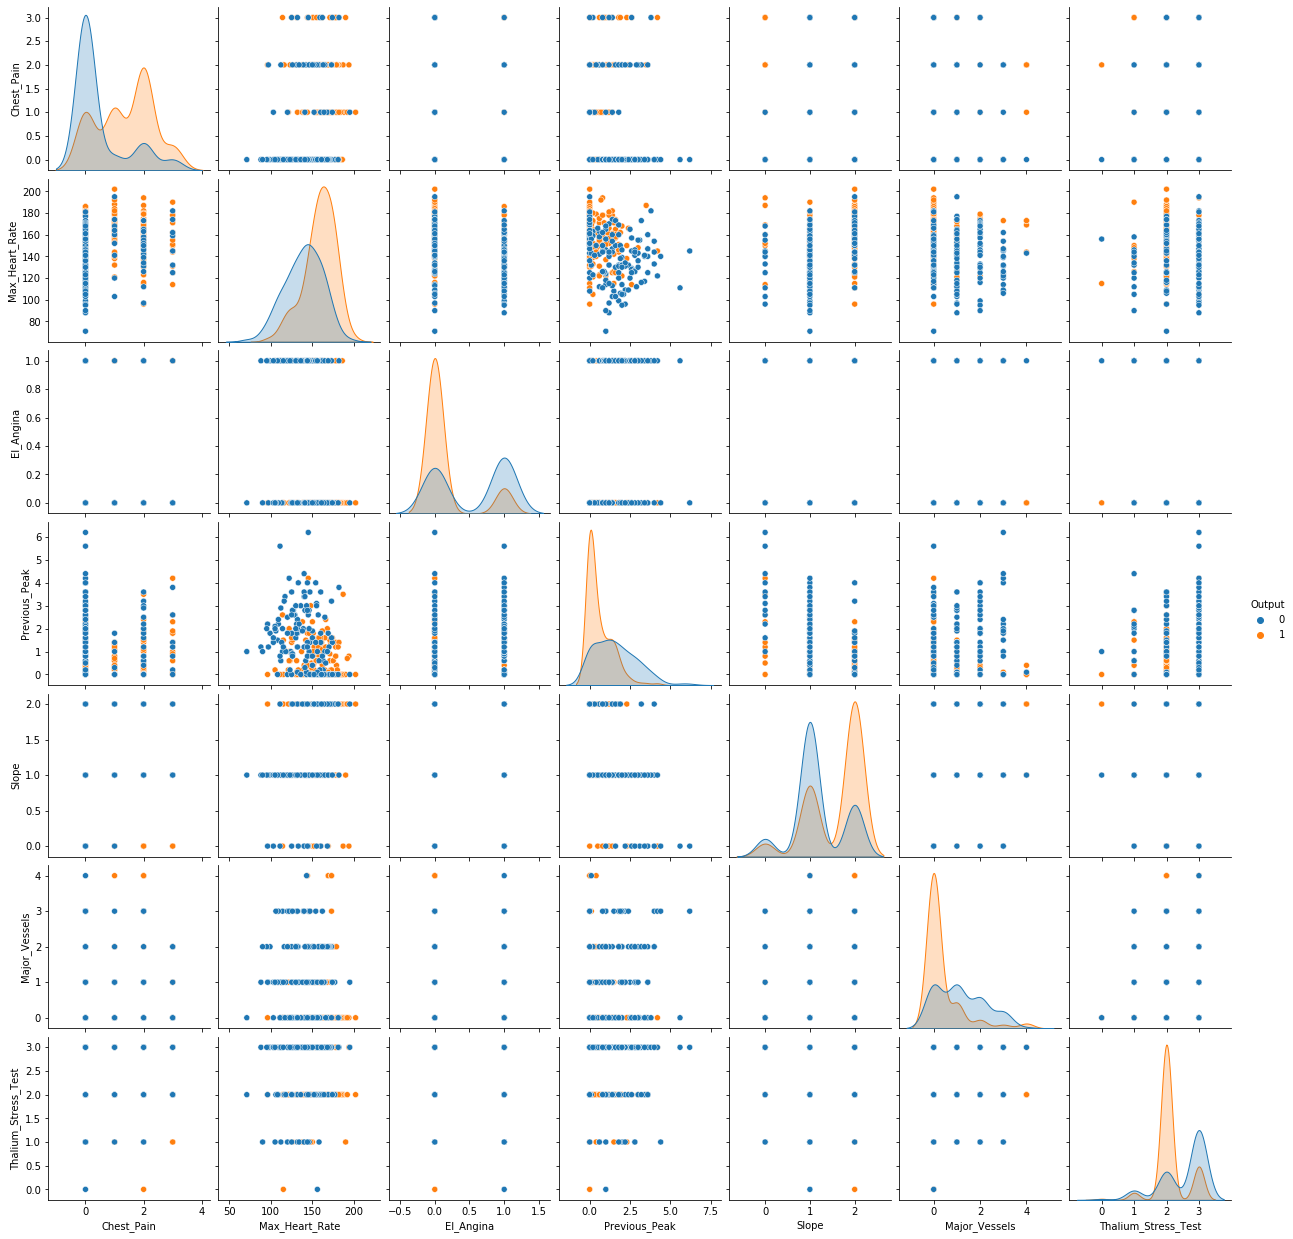

Start Time : 1626935845.647957 seconds
End Time : 1626935845.6889944 seconds
Elapsed Time : 0.04103732109069824 seconds
ACCURACY  SCORE basis training data : 0.8458149779735683
ACCURACY  SCORE basis test data: 0.868421052631579
CONFUSION MATRIX basis training data:
[[111  13]
 [ 22  81]]
CONFUSION MATRIX basis testing data:
[[37  4]
 [ 6 29]]


In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import time

heart_data = pd.read_csv('HeartAttack.csv')

df = pd.DataFrame(heart_data,columns=['Output','Chest_Pain', 'Max_Heart_Rate', 'EI_Angina',
                         'Previous_Peak', 'Slope', 'Major_Vessels', 'Thalium_Stress_Test'])
X = df.iloc[:,1:8]
y = df['Output']
sb.pairplot (df, hue='Output')
plt.show()

start = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
logReg = LogisticRegression(solver = 'lbfgs',dual=False, 
                            multi_class = 'multinomial', random_state = 42,max_iter=5000)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)

end = time.time()
elapsed=end-start

print('Start Time : {0} seconds'.format(start))
print('End Time : {0} seconds'.format(end))
print('Elapsed Time : {0} seconds'.format(elapsed))

print('ACCURACY  SCORE basis training data : {0}'.format(accuracy_score(y_train,
                                                        logReg.predict(X_train))))
print('ACCURACY  SCORE basis test data: {0}'.format(accuracy_score(y_test, y_pred)))

print('CONFUSION MATRIX basis training data:')
print(confusion_matrix (y_train, logReg.predict(X_train), labels = [1,0]))

print('CONFUSION MATRIX basis testing data:')
print(confusion_matrix(y_test, y_pred, labels = [1,0]))



# EX 1

[0]


array([[0.90131279, 0.09868721]])

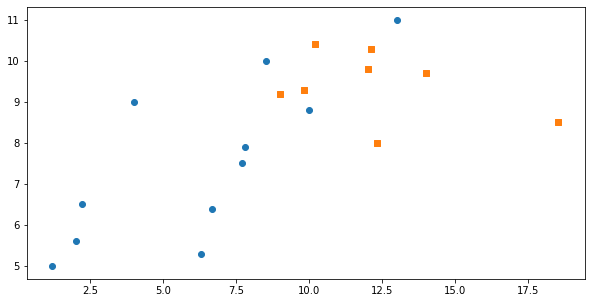

In [5]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# read in data from the file
df = pd.read_csv('Logistic_Reg_Infected.csv').dropna()
df.head() # show the first five values

df_0 = df[df['infected'] == 0]
df_1 = df[df['infected'] == 1]

# in this plot, data points above the line are categorized as 1, those below the line are categorized as 0
# this line is our regression model's decision boundary
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df_0['age'], df_0['sleep']) # class = 0 circle points 
ax.scatter(df_1['age'], df_1['sleep'], marker = 's') # class = 1 square points
x_min, x_max = ax.get_xlim()



logReg = LogisticRegression(solver = 'lbfgs')

x = df[['age', 'sleep']]
y = df['infected']    # Classification : infected = 0 or 1

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
x_train.head()

logReg.fit(x_train, y_train)

# predict y when x1 = 7.5 and x2 = 0.65
logReg.predict([[7.5,0.65]])  

# predict y when x1 = 10 and x2 = 0.74
print(logReg.predict([[10, 0.74]]))

# probability of getting 0 versus 1
logReg.predict_proba(x_test)

# probability of getting 0 versus 1
logReg.predict_proba([[10, 0.74]])

In [6]:
# predict y when x1 = 7.5 and x2 = 0.65
logReg.predict([[7.5,0.65]])  

# predict y when x1 = 10 and x2 = 0.74
print(logReg.predict([[10, 0.74]]))

# probability of getting 0 versus 1
logReg.predict_proba(x_test)

# probability of getting 0 versus 1
logReg.predict_proba([[10, 0.74]])

[0]


array([[0.90131279, 0.09868721]])

In [7]:
# probability of getting 0 versus 1
logReg.predict_proba(x_test)

array([[0.51389417, 0.48610583],
       [0.99133891, 0.00866109],
       [0.62011799, 0.37988201],
       [0.02035873, 0.97964127],
       [0.94756335, 0.05243665]])